# This ipynb is only used in EBRAINS Collaboratory

In [1]:
!pwd

/opt/app-root/src


In [ ]:
!git pull origin master

In [3]:
import os
home_dir = "/opt/app-root/src"
file_path = "shared/NMC test collab for user takepiyo/SpiNNaker/SpiNNakerSource/va_benchmark.py"
target_file_path = os.path.join(home_dir, file_path)
print(target_file_path)

/opt/app-root/src/shared/NMC test collab for user takepiyo/SpiNNaker/SpiNNakerSource/va_benchmark.py


In [1]:
!pip install -U hbp_neuromorphic_platform
!pip install ebrains-drive

Defaulting to user installation because normal site-packages is not writeable
Using legacy 'setup.py install' for hbp-neuromorphic-platform, since package 'wheel' is not installed.
Using legacy 'setup.py install' for validators, since package 'wheel' is not installed.
    Running setup.py install for validators ... done
    Running setup.py install for hbp-neuromorphic-platform ... done
Defaulting to user installation because normal site-packages is not writeable


## Create our client

Because we are already logged into the HBP Collaboratory,
there is no need to enter your username or password.

If running this notebook locally on your own computer,
you will need to specify your username, and you will be
prompted for the password.

In [11]:
import nmpi
import hbp_service_client
client = nmpi.Client()
import time
import ebrains_drive
from ebrains_drive.client import DriveApiClient

class RepositoryInformation:
    def __init__(self,repository,nameInTheUrl):
        self.repository=repository
        self.nameInTheUrl=nameInTheUrl
    def toString(self):
        return "nameInTheUrl="+self.nameInTheUrl+", full name="+self.repository.name+", id="+self.repository.id
        
def findRepositoryInfoFromDriveDirectoryPath(homePath):
    #print("The homePath given: ",homePath)
    name=homePath.replace("/mnt/user/shared/","")
    if name.find("/")>-1:
        name=name[:name.find("/")]
    thisCollabsTitle=name
    #print(thisCollabsTitle)
    #print("List the resource allocatino ('quota') for this collab:")
    bearer_token = clb_oauth.get_token()
    #client = ebrains_drive.connect(username="username", password="password")
    ebrains_drive_client = ebrains_drive.connect(token=bearer_token)
    repo_by_title = ebrains_drive_client.repos.get_repos_by_filter("name",thisCollabsTitle)
    if len(repo_by_title)!=1:
        raise Excaption("The repository for the collab name",thisCollabsName,"can not be found")
    #print(repo_by_title)
    #unfortunately the repository object does not return the collabs name-part-in-the-url, which is needed by the 
    #quota handling (under the name of collab_id). So try to get that from the owner
    owner=repo_by_title[0].owner
    #print("owner=",owner)
    collabNameInTheUrl=owner[:owner.rindex("-")]
    #and the owner name starts with collab-, which also needs to be removed
    collabNameInTheUrl=collabNameInTheUrl[collabNameInTheUrl.find("-")+1:]
    #print(collabNameInTheUrl)
    return RepositoryInformation(repo_by_title[0],collabNameInTheUrl)

client = nmpi.Client()

dir=!pwd
repoInfo=findRepositoryInfoFromDriveDirectoryPath(dir[0])
#print("Repo info ",repoInfo.toString())

a=client.list_resource_requests(repoInfo.nameInTheUrl)
#print("Going to use for the quota request: ",repoInfo.nameInTheUrl)
anyAccepted=False
if len(a)==0: 
    print("This collab does not have any quota entry yet. Request a test quota. This request will need to be reviewd and granted by an admin")
    client.create_resource_request(
    title="Test quota request for "+repoInfo.nameInTheUrl,
    collab_id=repoInfo.nameInTheUrl, 
    abstract="Test quota request",
    submit=True)
else:
    for entry in a:
        #print("Entry=",entry)
        if entry["status"]=="accepted":
            print("An accepted quota request exists")
            anyAccepted=True
    if not anyAccepted:
        print("A quota request is present, but it has not yet been granted.")
if not anyAccepted:
    raise Exception("This collab does not yet have an accepted quota entry.\nTherefore submitting jobs will not yet work.")
    
collab_id = repoInfo.nameInTheUrl
print("Using the repository ",collab_id," for quotas. Starting the job at",time.ctime())
job = client.submit_job(source=target_file_path,
                        platform=nmpi.SPINNAKER,
                        collab_id=collab_id,
                        command="run.py",
                        wait=True)
print(job["log"])

An accepted quota request exists
Using the repository  nmc-test-takepiyo  for quotas. Starting the job at Fri Mar  4 11:22:41 2022
Job submitted
Job finished
Running from /tmp/job7793108405579962446.tmp; changing to spinnaker
Going back to /tmp/job7793108405579962446.tmp
total 20
-rw-rw-r-- 1 spinnaker spinnaker   68 Mar  4 10:24 output_1977353536664793962.txt
-rw-rw-r-- 1 spinnaker spinnaker 8159 Mar  4 10:24 run.py
-rw-rw-r-- 1 spinnaker spinnaker 7006 Mar  4 10:24 setup.bash
2022-03-04 10:24:48 INFO: Read cfg files: /home/spinnaker/spinnaker/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/spinnaker/spinnaker/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/spinnaker/.spynnaker.cfg, ./spynnaker.cfg
2022-03-04 10:24:48 INFO: Will search these locations for binaries: /home/spinnaker/spinnaker/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/spinnaker/spinnaker/sPyNNaker/spynnaker/pyNN/model_binaries
2022-03-04 10:24:48 INFO: Setting time s

Fetched the files ['/opt/app-root/src/job_163488/reports.zip', '/opt/app-root/src/job_163488/output_1977353536664793962.txt', '/opt/app-root/src/job_163488/figure.png']
['/opt/app-root/src/job_163488/figure.png']
/opt/app-root/src/job_163488/figure.png


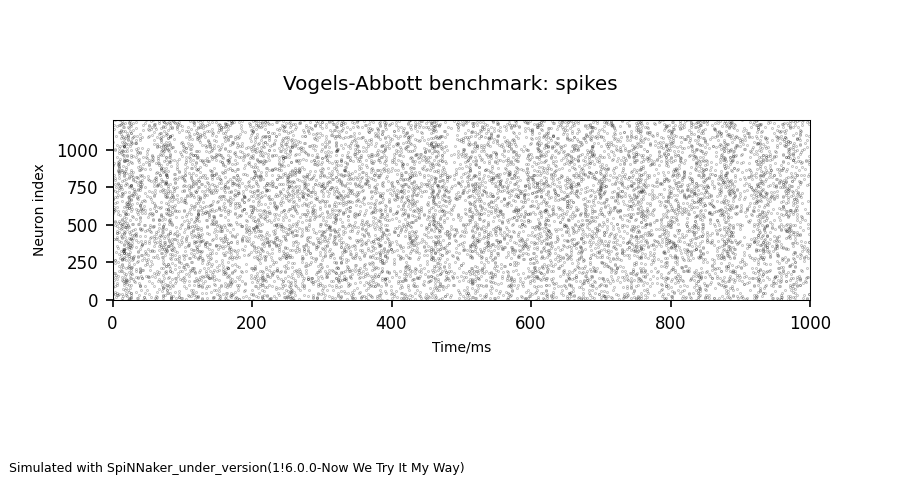

In [12]:
filenames = client.download_data(job, local_dir=os.path.expanduser("~"))
print("Fetched the files",filenames)
image_filenames = [name for name in filenames if name.endswith(".png")]
print(image_filenames)
from IPython.display import Image
from IPython.display import display

for image_name in sorted(image_filenames):
    print(image_name)
    display(Image(image_name))